In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
path = os.getcwd()
df = pd.read_csv(path+'/Data/df_waittime.csv')

- Check grids en assen

#### 1. Show statistical differences between 1, 2 and 4 servers
With $\mu = 1$, $\rho = 0.75$ and therefore $\lambda = [0.75,\ 1.5,\ 3]$ respectively.

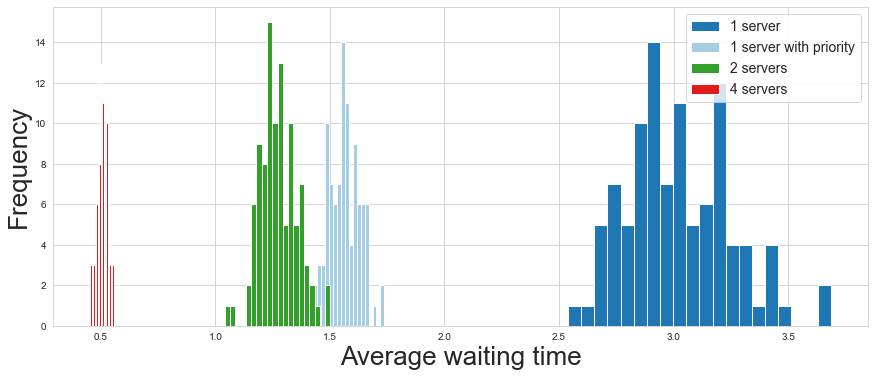

In [5]:
sns.set_style('whitegrid')

fig, axs = plt.subplots(1, figsize=(12,5))
fig.tight_layout()     
palette = sns.color_palette("Paired")

#Plot histograms
axs.hist(df["('exp', 1, 0.75)"],bins=20,color=palette[1],label='1 server')
axs.hist(df["('priority', 1, 0.75)"],bins=20,color=palette[0],label='1 server with priority')

axs.hist(df["('exp', 2, 0.75)"],bins=20,color=palette[3],label='2 servers')
axs.hist(df["('exp', 4, 0.75)"],bins=20,color=palette[5],label='4 servers')

#Edit axis and labels etc.
axs.set_xlabel(r'Average waiting time', fontsize=26)
axs.set_ylabel(r'Frequency', fontsize=26)
# axs.set_yticks(np.arange(-0.1,0.35,0.05))
# axs.set_yticklabels(np.round(np.arange(-0.1,0.35,0.05),2), fontsize=26)
# axs.set_xticks(np.arange(0,5500,1000))
# axs.set_xticklabels(np.arange(0,5500,1000), fontsize=26)
# axs.set_xlim((0,5))
# axs.set_ylim((0,0.3))
axs.legend(fontsize=14,loc='upper right',ncol=1)
# fig.savefig('Figures/varianceplot_solo_i_as_x.pdf',dpi=300)
plt.show()

#### 2. Calculate t-statistics and visualise over varying $\rho$

- $\textit{Maybe add plot with means/stds of different queues}$


T-statistic with rho = 0.5, comparing 1 and 2 servers: 124.60882934577215
T-statistic with rho = 0.5, comparing 1 and 4 servers: 181.14369316074104


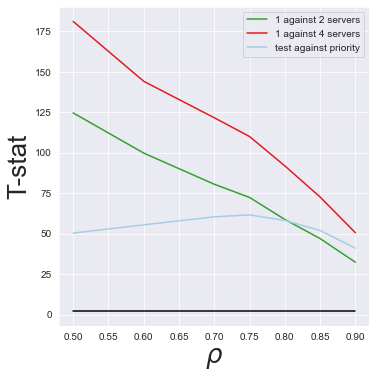

In [6]:
sns.set_style("darkgrid")
rho = [0.5,0.6,0.7,0.75,0.8,0.85,0.9]
servers = [1, 2, 4,'priority']
tstats = []
for n in servers:
    t_loop = []
    if n == 'priority':
        for r in rho:
            t, p = stats.ttest_ind(df["('exp', 1, "+str(r)+")"],df["('priority', 1, "+str(r)+")"],equal_var=False)
            t_loop.append(t)
    else:
        for r in rho:
            t, p = stats.ttest_ind(df["('exp', 1, "+str(r)+")"],df["('exp', "+str(n)+", "+str(r)+")"],equal_var=False)
            t_loop.append(t)
    tstats.append(t_loop)

print('T-statistic with rho = 0.5, comparing 1 and 2 servers: '+str(tstats[1][0]))
print('T-statistic with rho = 0.5, comparing 1 and 4 servers: '+str(tstats[2][0]))

fig, axs = plt.subplots(1, figsize=(5,5))
fig.tight_layout()  
axs.plot(rho,tstats[1],color=palette[3],label=r'1 against 2 servers')
axs.plot(rho,tstats[2],color=palette[5],label=r'1 against 4 servers')
axs.plot(rho,tstats[3],color=palette[0],label=r'test against priority')
axs.plot(rho,np.repeat(stats.t.ppf(0.975,99),len(rho)),color='k')

axs.set_ylabel(r'T-stat', fontsize=26)
axs.set_xlabel(r'$\rho$', fontsize=26)

axs.legend()


#### 3. Explore other distributions, both with varying $\lambda$ 

- Only focus on n = 1,2 or also 4?
- Create table of t-stats or not necessary?

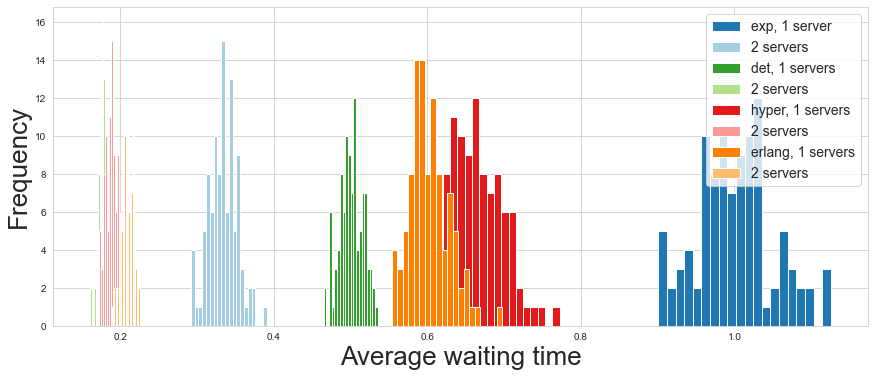

In [8]:
sns.set_style("whitegrid")
fig, axs = plt.subplots(1, figsize=(12,5))
fig.tight_layout()     
palette = sns.color_palette("Paired")

#Plot histograms
axs.hist(df["('exp', 1, 0.5)"],bins=20,color=palette[1],label='exp, 1 server')
axs.hist(df["('exp', 2, 0.5)"],bins=20,color=palette[0],label='2 servers')
axs.hist(df["('deterministic', 1, 0.5)"],bins=20,color=palette[3],label='det, 1 servers')
axs.hist(df["('deterministic', 2, 0.5)"],bins=20,color=palette[2],label='2 servers')
axs.hist(df["('hyperexp', 1, 0.5)"],bins=20,color=palette[5],label='hyper, 1 servers')
axs.hist(df["('hyperexp', 2, 0.5)"],bins=20,color=palette[4],label='2 servers')
axs.hist(df["('erlang', 1, 0.5)"],bins=20,color=palette[7],label='erlang, 1 servers')
axs.hist(df["('erlang', 2, 0.5)"],bins=20,color=palette[6],label='2 servers')

#Edit axis and labels etc.
axs.set_xlabel(r'Average waiting time', fontsize=26)
axs.set_ylabel(r'Frequency', fontsize=26)
# axs.set_yticks(np.arange(-0.1,0.35,0.05))
# axs.set_yticklabels(np.round(np.arange(-0.1,0.35,0.05),2), fontsize=26)
# axs.set_xticks(np.arange(0,5500,1000))
# axs.set_xticklabels(np.arange(0,5500,1000), fontsize=26)
# axs.set_xlim((0,5000))
# axs.set_ylim((0,0.3))
axs.legend(fontsize=14,loc='upper right',ncol=1)
# fig.savefig('Figures/varianceplot_solo_i_as_x.pdf',dpi=300)

T-statistic with rho = 0.5, comparing 1 and 2 servers: 197.26364028938647
T-statistic with rho = 0.5, comparing 1 and 4 servers: 197.26364028938647


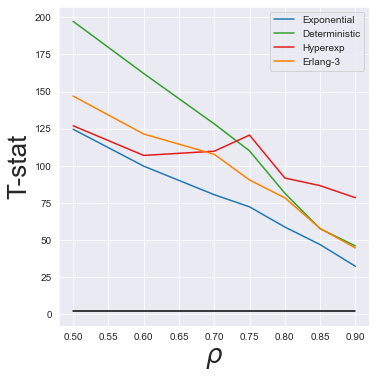

In [10]:
sns.set_style("darkgrid")
rho = [0.5,0.6,0.7,0.75,0.8,0.85,0.9]
dist = ['exp','deterministic','hyperexp','erlang']
tstats = []
    
for d in dist:
    for n in servers:
        t_loop = []
        for r in rho:
            t, p = stats.ttest_ind(df["('"+str(d)+"', 1, "+str(r)+")"],df["('"+str(d)+"', 2, "+str(r)+")"],equal_var=False)
            t_loop.append(t)
    tstats.append(t_loop)

print('T-statistic with rho = 0.5, comparing 1 and 2 servers: '+str(tstats[1][0]))
print('T-statistic with rho = 0.5, comparing 1 and 4 servers: '+str(tstats[1][0]))

fig, axs = plt.subplots(1, figsize=(5,5))
fig.tight_layout()  
axs.plot(rho,tstats[0],color=palette[1],label=r'Exponential')
axs.plot(rho,tstats[1],color=palette[3],label=r'Deterministic')
axs.plot(rho,tstats[2],color=palette[5],label=r'Hyperexp')
axs.plot(rho,tstats[3],color=palette[7],label=r'Erlang-3')

axs.plot(rho,np.repeat(stats.t.ppf(0.975,99),len(rho)),color='k')

axs.set_ylabel(r'T-stat', fontsize=26)
axs.set_xlabel(r'$\rho$', fontsize=26)
axs.legend()
